<a href="https://colab.research.google.com/github/ruchithareddy269/255-Final-Project/blob/main/CMPE_255_final_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **We will import the necessary libraries here**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## 1. 🧳 **Business Understanding:**

Worldwide, bike-sharing programs are now an essential part of urban transportation networks, providing consumers with an adaptable and reasonably priced option for short-term bike rentals. The company wants to predict customer demand and acquire insights into user behavior in order to optimize the bike-sharing system. It is essential to comprehend the variables that affect bike rentals, such as temperature, season, and weather, in order to effectively manage bike availability and improve user experience. For the bike-sharing program to be successful, it is necessary to predict with precision how many users will rent bikes in different scenarios. This will enable proactive system management and resource allocation.


# **2. 💡 Data Understanding** :
 A thorough data cleaning procedure was required after the preliminary data exploration revealed missing values, particularly in weather-related features. Pre-processing procedures ensured the integrity of the dataset for subsequent analysis by handling null values with forward-fill and suitable replacements. To provide a comprehensive picture of customer behavior, more temporal features were extracted and weather attributes were combined to create new features. To find patterns and trends that help with precise forecasting and bike-sharing system optimization, the next steps entail in-depth time-series analysis, visualization, and modeling.


#**Reading the data**

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2922 non-null   object 
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   object 
 8   wt_heavy_fog       2922 non-null   object 
 9   wt_thunder         2922 non-null   object 
 10  wt_sleet           2922 non-null   object 
 11  wt_hail            2922 non-null   object 
 12  wt_glaze           2922 non-null   object 
 13  wt_haze            2922 non-null   object 
 14  wt_drift_snow      2922 non-null   object 
 15  wt_high_wind       2922 non-null   object 
 16  wt_mist            2922 

In [ ]:
df

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,?,-1.566667,11.973333,2.772727,0.069333,2.575000,1.0,?,?,...,?,?,?,?,?,?,330.0,629.0,959.0,?
1,2011-01-02,?,0.880000,13.806667,7.327273,1.037349,3.925000,1.0,1.0,?,...,?,?,?,?,?,?,130.0,651.0,781.0,?
2,2011-01-03,?,-3.442857,7.464286,-3.060000,1.878824,3.625000,?,?,?,...,?,?,?,?,?,?,120.0,1181.0,1301.0,?
3,2011-01-04,?,-5.957143,4.642857,-3.100000,0.000000,1.800000,?,?,?,...,?,?,?,?,?,?,107.0,1429.0,1536.0,?
4,2011-01-05,?,-4.293333,6.113333,-1.772727,0.000000,2.950000,?,?,?,...,?,?,?,?,?,?,82.0,1489.0,1571.0,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.5,-3.591667,9.125000,-1.055556,0.024096,2.100000,1.0,?,?,...,?,?,?,?,?,?,1150.0,4280.0,5430.0,?
2918,2018-12-28,8.233333333333333,0.608333,11.208333,8.088889,16.843820,2.000000,1.0,1.0,?,...,?,?,?,?,?,?,166.0,1959.0,2125.0,?
2919,2018-12-29,9.5,3.925000,12.416667,5.311111,11.550575,3.666667,1.0,1.0,?,...,?,?,?,?,?,?,1756.0,4252.0,6008.0,?
2920,2018-12-30,4.8,0.816667,11.066667,2.088889,0.104651,1.200000,?,?,?,...,?,?,?,?,?,?,1295.0,3634.0,4929.0,?


Many values in the provided data are missing. We first replace all instances of '?' with null values to make handling these missing values easier. We then use techniques for missing value imputation to handle and effectively manage the missing data in our code.

#**Data cleaning**

In [ ]:
#Replace '?' with null values
df.replace(to_replace = '?', value = np.NaN,inplace=True)

In [ ]:
df.columns

Index(['date', 'temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip',
       'wind', 'wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown', 'casual', 'registered',
       'total_cust', 'holiday'],
      dtype='object')

In [ ]:
#Since the values in the weather columns should either be 0 or 1, remove all null values individually.
weather_columns = [x for x in df.columns if 'wt' in x]
for i in weather_columns:
  df[i].fillna(0,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2101 non-null   object 
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   object 
 8   wt_heavy_fog       2922 non-null   object 
 9   wt_thunder         2922 non-null   object 
 10  wt_sleet           2922 non-null   object 
 11  wt_hail            2922 non-null   object 
 12  wt_glaze           2922 non-null   object 
 13  wt_haze            2922 non-null   object 
 14  wt_drift_snow      2922 non-null   object 
 15  wt_high_wind       2922 non-null   object 
 16  wt_mist            2922 

In [ ]:
#Convert the columns to float type
df[['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown','casual','registered','total_cust','holiday']] = df[['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown','casual','registered','total_cust','holiday']].apply(pd.to_numeric)

In [ ]:
df

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,330.0,629.0,959.0,NaN
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,130.0,651.0,781.0,NaN
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.0,1181.0,1301.0,NaN
3,2011-01-04,NaN,-5.957143,4.642857,-3.100000,0.000000,1.800000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,107.0,1429.0,1536.0,NaN
4,2011-01-05,NaN,-4.293333,6.113333,-1.772727,0.000000,2.950000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,1489.0,1571.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.5,-3.591667,9.125000,-1.055556,0.024096,2.100000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,4280.0,5430.0,NaN
2918,2018-12-28,8.233333333333333,0.608333,11.208333,8.088889,16.843820,2.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,166.0,1959.0,2125.0,NaN
2919,2018-12-29,9.5,3.925000,12.416667,5.311111,11.550575,3.666667,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1756.0,4252.0,6008.0,NaN
2920,2018-12-30,4.8,0.816667,11.066667,2.088889,0.104651,1.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1295.0,3634.0,4929.0,NaN


The weather columns' null values have all been cleaned, as can be seen. The missing values in the temp_avg column will now be imputed. For the time being, we use the average of temp_max and temp_min due to simplicity.

In the given code snippet, the pd.to_numeric function is used to convert the 'temp_avg' column in a pandas DataFrame (df) to numeric values. The errors='coerce' parameter is specified to handle errors during the conversion.

The **errors='coerce'** parameter is set to 'coerce,' which means that if any value in the 'temp_avg' column cannot be converted to a numeric type, it will be replaced with a NaN (Not a Number) value.

In [ ]:
# Assuming df is your DataFrame
df['temp_avg'] = pd.to_numeric(df['temp_avg'], errors='coerce')
df['temp_avg'].fillna((df['temp_max'] + df['temp_min']) / 2, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2922 non-null   float64
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   float64
 8   wt_heavy_fog       2922 non-null   float64
 9   wt_thunder         2922 non-null   float64
 10  wt_sleet           2922 non-null   float64
 11  wt_hail            2922 non-null   float64
 12  wt_glaze           2922 non-null   float64
 13  wt_haze            2922 non-null   float64
 14  wt_drift_snow      2922 non-null   float64
 15  wt_high_wind       2922 non-null   float64
 16  wt_mist            2922 

In [ ]:
df.isnull().sum()

date                    0
temp_avg                0
temp_min                0
temp_max                0
temp_observ             0
precip                  0
wind                    0
wt_fog                  0
wt_heavy_fog            0
wt_thunder              0
wt_sleet                0
wt_hail                 0
wt_glaze                0
wt_haze                 0
wt_drift_snow           0
wt_high_wind            0
wt_mist                 0
wt_drizzle              0
wt_rain                 0
wt_freeze_rain          0
wt_snow                 0
wt_ground_fog           0
wt_ice_fog              0
wt_freeze_drizzle       0
wt_unknown              0
casual                  4
registered              4
total_cust              4
holiday              2833
dtype: int64

Determine which values in the total_customers columns are missing.

In [ ]:
df[df['casual'].isna()]

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
1848,2016-01-23,-4.366667,-6.128571,-2.392857,-4.688889,42.045946,8.08,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1849,2016-01-24,-2.666667,-7.985714,-1.028571,-6.366667,19.339130,3.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1850,2016-01-25,-5.133333,-11.128571,2.028571,-9.877778,0.000000,1.15,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1851,2016-01-26,2.333333,-7.871429,7.471429,3.588889,0.000000,2.85,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


It is evident that the four missing values in the data are consistent across all customer columns. Either the rows can be eliminated or the data can be imputed. We perform the forward filling imputation because the attributes are typically closer to one another in the upcoming timestamp because the data is a time series.

In [ ]:
df[['casual','registered','total_cust']] = df[['casual','registered','total_cust']].fillna(method = 'ffill')

In [ ]:
#Fill the values in holiday as 0 if it is not a holiday else it is given as 1
df['holiday'].fillna(0,inplace=True)

In [ ]:
#Round of the values to 2 decimal places
df_v2 = df.round(2)

In [ ]:
df_v2.isnull().sum()

date                 0
temp_avg             0
temp_min             0
temp_max             0
temp_observ          0
precip               0
wind                 0
wt_fog               0
wt_heavy_fog         0
wt_thunder           0
wt_sleet             0
wt_hail              0
wt_glaze             0
wt_haze              0
wt_drift_snow        0
wt_high_wind         0
wt_mist              0
wt_drizzle           0
wt_rain              0
wt_freeze_rain       0
wt_snow              0
wt_ground_fog        0
wt_ice_fog           0
wt_freeze_drizzle    0
wt_unknown           0
casual               0
registered           0
total_cust           0
holiday              0
dtype: int64

All of the data's missing values have been eliminated.

In [ ]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2922 non-null   float64
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   float64
 8   wt_heavy_fog       2922 non-null   float64
 9   wt_thunder         2922 non-null   float64
 10  wt_sleet           2922 non-null   float64
 11  wt_hail            2922 non-null   float64
 12  wt_glaze           2922 non-null   float64
 13  wt_haze            2922 non-null   float64
 14  wt_drift_snow      2922 non-null   float64
 15  wt_high_wind       2922 non-null   float64
 16  wt_mist            2922 

In [ ]:
#Cleaned data following imputation of missing values
df_v2

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,5.20,-1.57,11.97,2.77,0.07,2.58,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,330.0,629.0,959.0,0.0
1,2011-01-02,7.34,0.88,13.81,7.33,1.04,3.92,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,130.0,651.0,781.0,0.0
2,2011-01-03,2.01,-3.44,7.46,-3.06,1.88,3.62,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.0,1181.0,1301.0,0.0
3,2011-01-04,-0.66,-5.96,4.64,-3.10,0.00,1.80,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,107.0,1429.0,1536.0,0.0
4,2011-01-05,0.91,-4.29,6.11,-1.77,0.00,2.95,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,1489.0,1571.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.50,-3.59,9.12,-1.06,0.02,2.10,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,4280.0,5430.0,0.0
2918,2018-12-28,8.23,0.61,11.21,8.09,16.84,2.00,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,166.0,1959.0,2125.0,0.0
2919,2018-12-29,9.50,3.93,12.42,5.31,11.55,3.67,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1756.0,4252.0,6008.0,0.0
2920,2018-12-30,4.80,0.82,11.07,2.09,0.10,1.20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1295.0,3634.0,4929.0,0.0


## Adding new variables to make data analysis easier

We will combine weather columns that are related to one another to reduce complexity into three categories—rain, fog, and ice—because there are many weather variables in our analysis. Every attribute that is closely related will be included in each newly created category.

In [ ]:
df_v2['rain'] = df_v2['wt_freeze_rain'] + df_v2['wt_drizzle'] + df_v2['wt_hail'] + df_v2['wt_rain'] + df_v2['wt_thunder'] + df_v2['wt_unknown'] + df_v2['wt_freeze_drizzle']
df_v2['fog'] = df_v2['wt_fog'] + df_v2['wt_ground_fog'] + df_v2['wt_haze'] + df_v2['wt_heavy_fog'] + df_v2['wt_high_wind'] + df_v2['wt_ice_fog'] + df_v2['wt_mist']
df_v2['ice'] = df_v2['wt_drift_snow'] + df_v2['wt_glaze'] + df_v2['wt_sleet'] + df_v2['wt_snow']

Ensure that the values remain at 1 or 0.

In [ ]:
df_v2['rain'] = df_v2['rain'].apply(lambda x: 0 if x==0 else 1)
df_v2['fog'] = df_v2['fog'].apply(lambda x: 0 if x==0 else 1)
df_v2['ice'] = df_v2['ice'].apply(lambda x: 0 if x==0 else 1)

In [ ]:
df_v2['rain'] = df_v2['rain'].astype('category')
df_v2['fog'] = df_v2['fog'].astype('category')
df_v2['ice'] = df_v2['ice'].astype('category')

In [ ]:
#Drop all the columns to simplify the dataframe
df_v2.drop(columns = weather_columns,inplace=True)

In order to further analyze our data, we will utilize the date column to create additional features like year, month, and day.

In [ ]:
df_v2['datetime'] = df_v2['date'].apply(pd.to_datetime)

In [ ]:
df_v2['year'] = pd.DatetimeIndex(df_v2['datetime']).year
df_v2['month'] = pd.DatetimeIndex(df_v2['datetime']).month_name()
df_v2['dayOfWeek'] = df_v2['datetime'].dt.day_name()

In [ ]:
df_v2

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,rain,fog,ice,datetime,year,month,dayOfWeek
0,2011-01-01,5.20,-1.57,11.97,2.77,0.07,2.58,330.0,629.0,959.0,0.0,1,1,0,2011-01-01,2011,January,Saturday
1,2011-01-02,7.34,0.88,13.81,7.33,1.04,3.92,130.0,651.0,781.0,0.0,1,1,0,2011-01-02,2011,January,Sunday
2,2011-01-03,2.01,-3.44,7.46,-3.06,1.88,3.62,120.0,1181.0,1301.0,0.0,0,0,0,2011-01-03,2011,January,Monday
3,2011-01-04,-0.66,-5.96,4.64,-3.10,0.00,1.80,107.0,1429.0,1536.0,0.0,0,0,0,2011-01-04,2011,January,Tuesday
4,2011-01-05,0.91,-4.29,6.11,-1.77,0.00,2.95,82.0,1489.0,1571.0,0.0,0,0,0,2011-01-05,2011,January,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.50,-3.59,9.12,-1.06,0.02,2.10,1150.0,4280.0,5430.0,0.0,0,1,0,2018-12-27,2018,December,Thursday
2918,2018-12-28,8.23,0.61,11.21,8.09,16.84,2.00,166.0,1959.0,2125.0,0.0,0,1,0,2018-12-28,2018,December,Friday
2919,2018-12-29,9.50,3.93,12.42,5.31,11.55,3.67,1756.0,4252.0,6008.0,0.0,0,1,0,2018-12-29,2018,December,Saturday
2920,2018-12-30,4.80,0.82,11.07,2.09,0.10,1.20,1295.0,3634.0,4929.0,0.0,0,0,0,2018-12-30,2018,December,Sunday


## Data analysis and visualisation

This section will show us the basic data distribution and plots related to it.

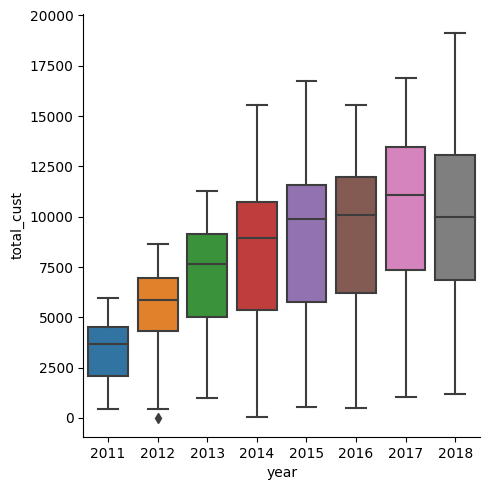

In [ ]:
#Plotting customers during each year
sns.catplot(x='year',y='total_cust',kind='box',data=df_v2)

The plot above suggests that the total number of registrations increased over time. Although the number of customers increased, the growth rate slowed down in the following years, with the first few years seeing the fastest growth.

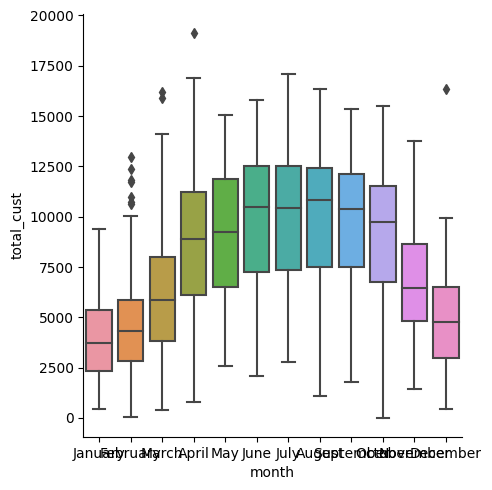

In [ ]:
#Plotting total customers during each month
sns.catplot(x='month',y='total_cust',kind='box',data=df_v2)

The above plot suggests that there are generally fewer customers during the months of April through October, which correspond to summer and fall when temperatures are at their highest. This is in contrast to spring and winter, when temperatures are too low. We can also see that there are a few anomalies, such as the day in February when more people registered. We can presume that a few unique occurrences may have contributed to the higher number of registrations on that specific day.

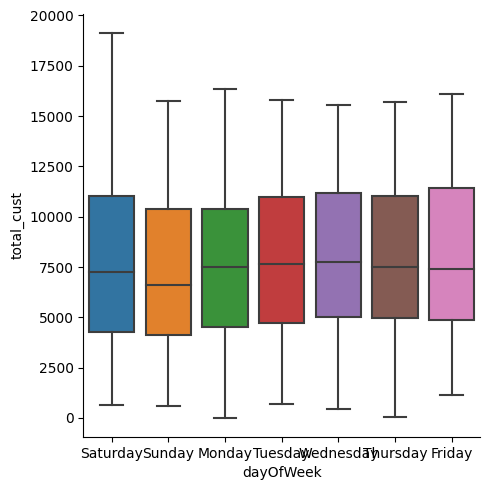

In [ ]:
#Plotting customers per day of the week
sns.catplot(x='dayOfWeek',y='total_cust',kind='box',data=df_v2)

We can deduce from the above plot that there are marginally more patrons on weekdays than on weekends. Weekdays have a higher number because we can assume that more people travel to work during that time and use rental bikes more frequently.

<Axes: xlabel='ice', ylabel='total_cust'>

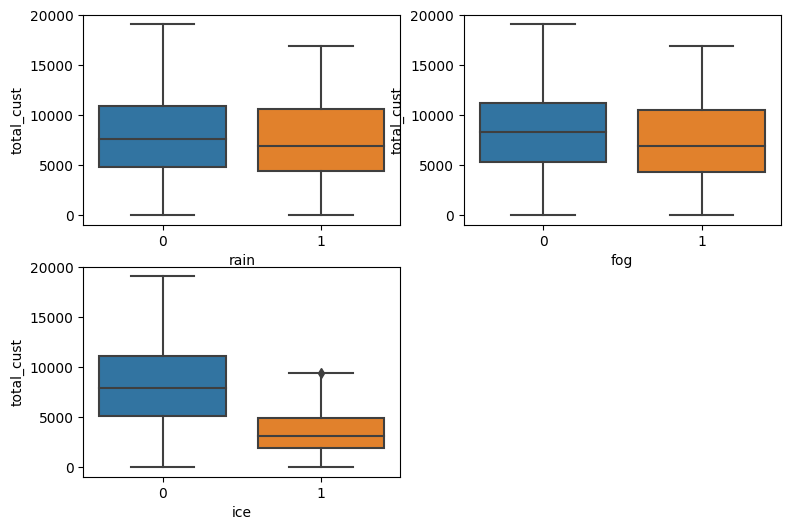

In [ ]:
#Plotting total customers during each weather conditions
plt.figure(figsize = [9, 6])
plt.subplot(2,2,1)
sns.boxplot(x='rain',y='total_cust',data=df_v2)
plt.subplot(2,2,2)
sns.boxplot(x='fog',y='total_cust',data=df_v2)
plt.subplot(2,2,3)
sns.boxplot(x='ice',y='total_cust',data=df_v2)

From the plot above, we can analyse the customers behaviour during each particular weather conditions. Rain has only slight effect on the number of customers registered where as fog has a slightly more effect on the demand. But during the snow times, the demand for the rental bikes is very less as less cutomers chose to ride the bikes during snow.

<Axes: xlabel='holiday', ylabel='total_cust'>

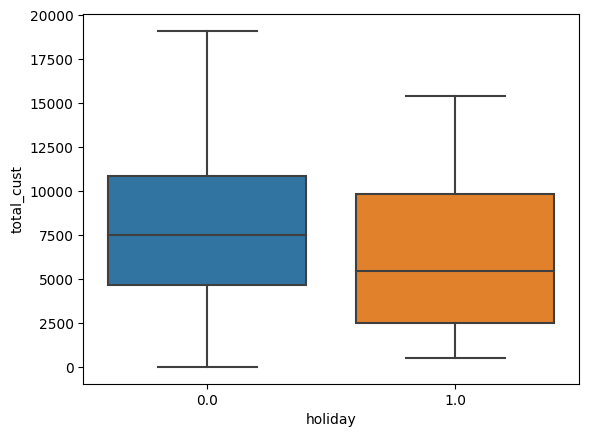

In [ ]:
sns.boxplot(x='holiday',y='total_cust',data=df_v2)

The plot above illustrates that a greater number of customers reserved bikes outside of holidays. From the above plot, we can infer that the demand for the bikes is impacted by going to work.

# **Correlation plots and analysis**

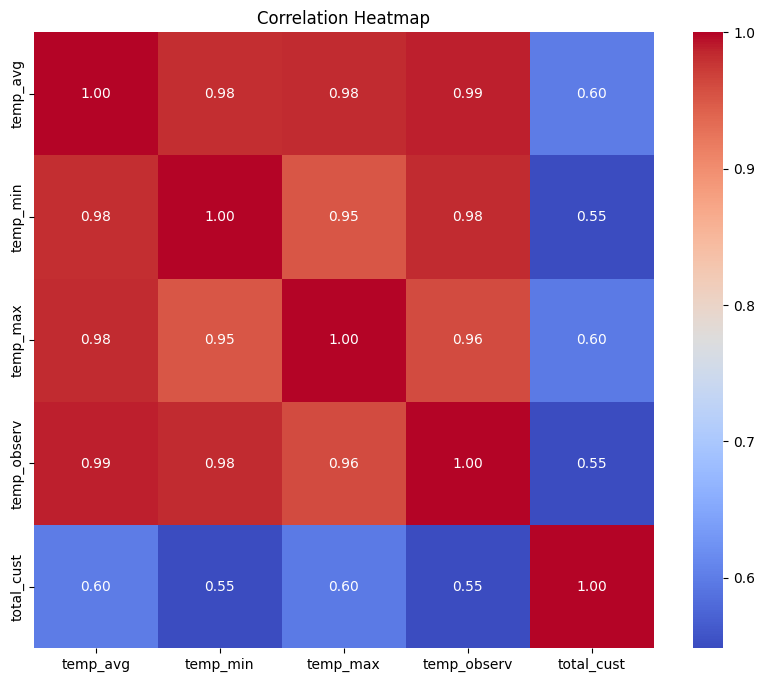

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_v2 is your DataFrame
correlation_matrix = df_v2[['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'total_cust']].corr()

# Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


To see the relationship between the temperature values and the total number of customers, we are plotting scatter plots in the plot above. It is evident that every temperature value has a perfect linear relationship. Moreover, there is a medium-level linear relationship between the temperature features and the total number of customers registered.

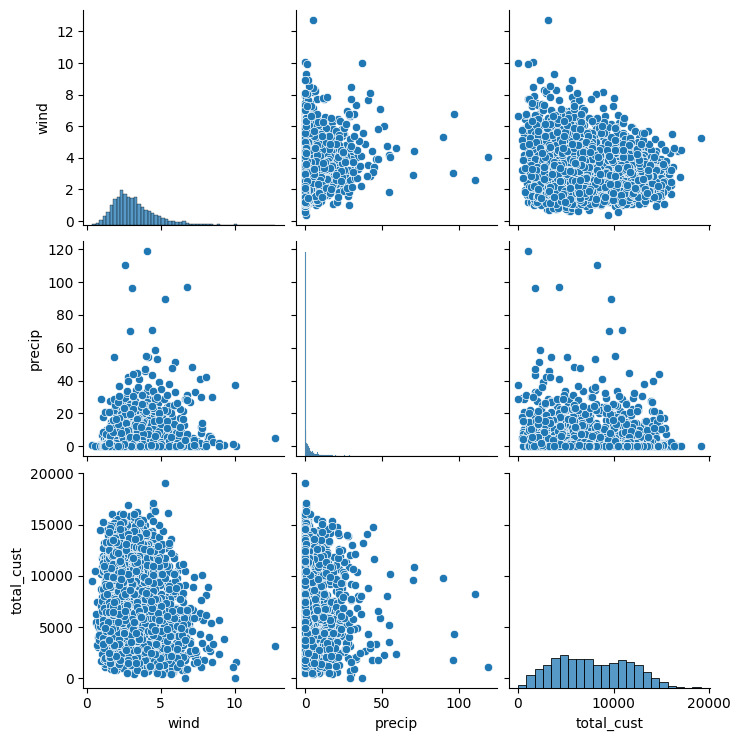

In [ ]:
sns.pairplot(df_v2,vars = ['wind','precip','total_cust'])

The plot above suggests that wind and precipitation have very little impact on the overall number of customers.

<Axes: >

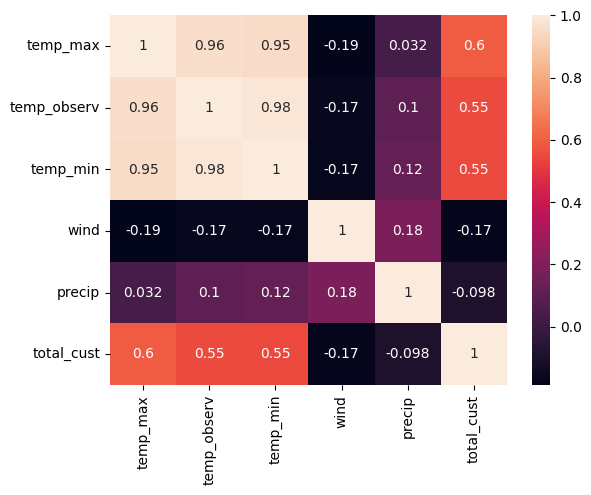

In [ ]:
sns.heatmap(df_v2[[ 'temp_max', 'temp_observ','temp_min', 'wind', 'precip', 'total_cust']].corr(),annot=True)

More precise relationships between the variables are shown in the heatmap above. Although there is no discernible relationship between the target variable and wind or precipitation, we can observe that the temperature feature has a strong relationship with it.

To gain further insight, we will use the Pearson's Coefficient Test to determine whether the temperature variable and the target variable have a linear relationship.

In [ ]:
print("Pearsonr test temp_avg ",pearsonr(df_v2['temp_avg'],df_v2['total_cust']))
print("Pearsonr test temp_max ",pearsonr(df_v2['temp_max'],df_v2['total_cust']))
print("Pearsonr test temp_min ",pearsonr(df_v2['temp_min'],df_v2['total_cust']))

Pearsonr test temp_avg  PearsonRResult(statistic=0.5992624450063637, pvalue=1.949004444509011e-284)
Pearsonr test temp_max  PearsonRResult(statistic=0.5962488355634555, pvalue=7.022821368275039e-281)
Pearsonr test temp_min  PearsonRResult(statistic=0.5484041948046313, pvalue=3.942337772205796e-229)


Pearson coefficient tells us how strong the relation is between two variables. From the above results we can see that temp_avg has stronger correlation with the target variable compared to temp_max and temp_min even though the difference is not much

In [ ]:
df_v2.describe()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,year
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,14.072317,8.506598,19.015674,11.069251,3.435623,3.163042,1677.561602,6042.021561,7719.583162,0.030459,2014.499658
std,9.536753,9.473867,9.835377,9.481130,8.183749,1.379595,1560.840858,2757.419767,3746.759171,0.171875,2.291531
min,-12.100000,-16.990000,-7.980000,-15.660000,0.000000,0.380000,2.000000,19.000000,21.000000,0.000000,2011.000000
25%,6.000000,0.520000,11.080000,3.015000,0.010000,2.200000,510.250000,3828.500000,4621.250000,0.000000,2012.250000
50%,14.770000,8.505000,19.990000,11.620000,0.270000,2.900000,1217.500000,5959.000000,7439.000000,0.000000,2014.500000
75%,22.800000,17.337500,27.877500,19.767500,2.887500,3.880000,2355.000000,8183.750000,10847.750000,0.000000,2016.000000
max,32.030000,26.210000,37.850000,28.670000,118.790000,12.750000,10173.000000,15419.000000,19113.000000,1.000000,2018.000000


## **Time-series data specific analysis**

We are dealing with a time series data. Apart from looking at the correlation plots and disctribution plots, we have to see if the data is stationary or non stationary. We will first plot line plots over time to check if the data is stationary or not.

<Axes: title={'center': 'Total customers registered over time'}, xlabel='date'>

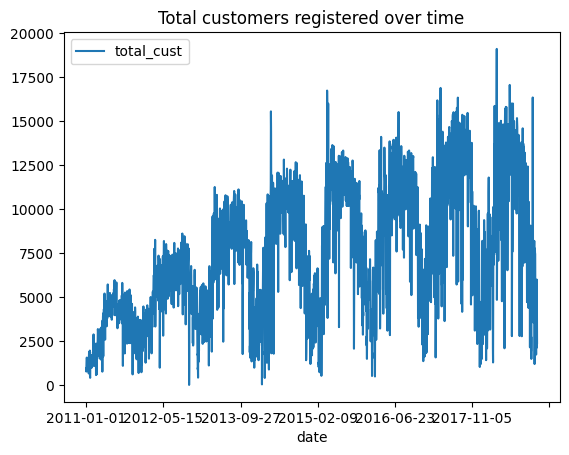

In [ ]:
df_v2.plot(x='date',y='total_cust',title='Total customers registered over time')

We can see from the above plot that our time series problem is non-stationary. We have to deal with this before modelling part. For now, we just analyse and make inferences visually and descriptively.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import xgboost
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# **AdaBoost (Adaptive Boosting):**

AdaBoost, short for Adaptive Boosting, is an ensemble learning method that belongs to the family of boosting algorithms. Developed by Yoav Freund and Robert Schapire in 1996, AdaBoost is particularly effective for binary classification problems but can be extended to multiclass classification and regression tasks.

In [ ]:
df_v3=pd.read_csv("dataset_ohe.csv")
df_v3.head()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,...,season_fall,dayOfWeek_Friday,dayOfWeek_Monday,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday,total_cust_log,total_cust_diff
0,5.20,-1.57,11.97,2.77,0.07,2.58,330.0,629.0,959.0,0.0,...,0,0,0,1,0,0,0,0,6.865891,6.865891
1,7.34,0.88,13.81,7.33,1.04,3.92,130.0,651.0,781.0,0.0,...,0,0,0,0,1,0,0,0,6.660575,-0.205316
2,2.01,-3.44,7.46,-3.06,1.88,3.62,120.0,1181.0,1301.0,0.0,...,0,0,1,0,0,0,0,0,7.170888,0.510313
3,-0.66,-5.96,4.64,-3.10,0.00,1.80,107.0,1429.0,1536.0,0.0,...,0,0,0,0,0,0,1,0,7.336937,0.166048
4,0.91,-4.29,6.11,-1.77,0.00,2.95,82.0,1489.0,1571.0,0.0,...,0,0,0,0,0,0,0,1,7.359468,0.022531


In [ ]:
X=df_v3.iloc[:,:]
X.drop(columns='total_cust')
y=pd.DataFrame(data=df_v3["total_cust"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [ ]:
x_array=X_train.values

In [ ]:
ada_clf = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators = 200, learning_rate = 1, random_state = 100)
ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1,
                  n_estimators=200, random_state=100)

In [ ]:
y_train_pred = ada_clf.predict(X_train)

In [ ]:
y_train.info()
y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 2369 to 1544
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_cust  2045 non-null   float64
dtypes: float64(1)
memory usage: 32.0 KB


,total_cust
2369,15015.0
746,3477.0
2175,4556.0
348,3670.0
2851,10201.0
...,...
1930,10523.0
79,2058.0
1859,4243.0
2840,6972.0


In [ ]:
df_v3.columns

Index(['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip', 'wind',
       'casual', 'registered', 'total_cust', 'holiday', 'rain', 'fog', 'ice',
       'year', 'season_spring', 'season_summer', 'season_fall',
       'dayOfWeek_Friday', 'dayOfWeek_Monday', 'dayOfWeek_Saturday',
       'dayOfWeek_Sunday', 'dayOfWeek_Thursday', 'dayOfWeek_Tuesday',
       'dayOfWeek_Wednesday', 'total_cust_log', 'total_cust_diff'],
      dtype='object')

# **Error Squared Root Mean (RMSE):**

Definition: Root Mean Square Error (RMSE) calculates the average error magnitude between predicted and actual values. The square root of the average of the squared discrepancies between the true and predicted values is used to compute it.
Interpretation Better model performance is indicated by a lower RMSE. It is appropriate for regression tasks because of its sensitivity to large errors.
# **RMSLE, or root mean squared logarithmic error:**

Definition: RMSLE is comparable to RMSE, but before calculating the error, it logarithmically transforms the true and predicted values. When the target variable has a large range, it is very helpful.
Interpretation: Lower RMSLE values are preferable, just like RMSE. It is appropriate for tasks where underprediction is more important because it penalizes underestimation more than overestimation.
R-squared, or coefficient of determination, or COD:


# **R-squared**:
It is defined as the percentage of the variance in the independent variables (features) that can be predicted from the dependent variable (target). It has a 0–1 range, where 1 represents an ideal fit.
Interpretation: Better goodness of fit is indicated by higher R-squared values. It should be used carefully though, as it might miss the accuracy of predictions for certain data points.
# **MAE, or Mean Absolute Error:**

The average absolute difference (MAE) between the true and predicted values is defined as follows. It offers a simple way to calculate the average prediction error.
Interpretation: A lower MAE is preferred, much like RMSE. Because MAE is less susceptible to outliers than RMSE, it is a good choice in situations where outliers shouldn't significantly affect the model's evaluation.

In [ ]:
rmse_adaboost = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmsle_adaboost = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
mae_adaboost = mean_absolute_error(y_train, y_train_pred)
cod_adaboost=r2_score(y_train, y_train_pred)
list_scores_ada = []
list_scores_ada.extend([rmse_adaboost, rmsle_adaboost, mae_adaboost,cod_adaboost])
rmse_adaboost
rmsle_adaboost
mae_adaboost
cod_adaboost
list_scores_ada

[0.37916392388199877,
 9.674028175716628e-05,
 0.06063569682151589,
 0.9999999897855025]

# **Bagging_meta_estimator**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

X=df_v3.iloc[:,:]
X.drop(columns='total_cust')
y=pd.DataFrame(data=df_v3["total_cust"])

In [ ]:
X['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [ ]:
x_array=X_train.values

In [ ]:
model = BaggingRegressor(base_estimator=SVR(), n_estimators=200, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, warm_start=False, n_jobs=None,random_state=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=SVR(), n_estimators=200, random_state=100)

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
y_train.info()
y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 2369 to 1544
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_cust  2045 non-null   float64
dtypes: float64(1)
memory usage: 32.0 KB


,total_cust
2369,15015.0
746,3477.0
2175,4556.0
348,3670.0
2851,10201.0
...,...
1930,10523.0
79,2058.0
1859,4243.0
2840,6972.0


In [ ]:
df_v3.columns

Index(['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip', 'wind',
       'casual', 'registered', 'total_cust', 'holiday', 'rain', 'fog', 'ice',
       'year', 'season_spring', 'season_summer', 'season_fall',
       'dayOfWeek_Friday', 'dayOfWeek_Monday', 'dayOfWeek_Saturday',
       'dayOfWeek_Sunday', 'dayOfWeek_Thursday', 'dayOfWeek_Tuesday',
       'dayOfWeek_Wednesday', 'total_cust_log', 'total_cust_diff'],
      dtype='object')

In [ ]:
rmse_bagging = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmsle_bagging= np.sqrt(mean_squared_log_error(y_train, y_train_pred))
mae_bagging = mean_absolute_error(y_train, y_train_pred)
cod_bagging=r2_score(y_train, y_train_pred)
list_scores_bagging = []
list_scores_bagging.extend([rmse_bagging, rmsle_bagging, mae_bagging,cod_bagging])
list_scores_bagging

[3400.5141787735797,
 0.6017925697394509,
 2881.1766675837257,
 0.17841562924925136]

# CatBoost

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
dataset_catboost=pd.read_csv("dataset_catboost.csv")
dataset_catboost.head()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,rain,fog,ice,year,season_spring,season_summer,season_fall,total_cust_log,total_cust_diff
0,5.20,-1.57,11.97,2.77,0.07,2.58,330.0,629.0,959.0,0.0,1,1,0,2011,1,0,0,6.865891,6.865891
1,7.34,0.88,13.81,7.33,1.04,3.92,130.0,651.0,781.0,0.0,1,1,0,2011,1,0,0,6.660575,-0.205316
2,2.01,-3.44,7.46,-3.06,1.88,3.62,120.0,1181.0,1301.0,0.0,0,0,0,2011,1,0,0,7.170888,0.510313
3,-0.66,-5.96,4.64,-3.10,0.00,1.80,107.0,1429.0,1536.0,0.0,0,0,0,2011,1,0,0,7.336937,0.166048
4,0.91,-4.29,6.11,-1.77,0.00,2.95,82.0,1489.0,1571.0,0.0,0,0,0,2011,1,0,0,7.359468,0.022531


In [ ]:
X=dataset_catboost.iloc[:,:]
X.drop(columns='total_cust')
y=pd.DataFrame(data=dataset_catboost["total_cust"])

In [ ]:
X['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [ ]:
x_array = X_train.values

In [ ]:
model = CatBoostRegressor(iterations=7,
                        learning_rate=0.5,
                        depth=None,
                        l2_leaf_reg=None,
                        model_size_reg=None,
                        rsm=None,
                        loss_function='RMSE',random_state=100)
model.fit(X_train, y_train)

0:	learn: 2085.1391067	total: 3.81ms	remaining: 22.9ms
1:	learn: 1193.4192845	total: 7.43ms	remaining: 18.6ms
2:	learn: 768.7171171	total: 10.7ms	remaining: 14.3ms
3:	learn: 527.2119052	total: 14.4ms	remaining: 10.8ms
4:	learn: 436.6353933	total: 18.3ms	remaining: 7.32ms
5:	learn: 378.1644437	total: 22ms	remaining: 3.66ms
6:	learn: 328.0467107	total: 25.5ms	remaining: 0us


In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
y_train.info()
y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 2369 to 1544
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_cust  2045 non-null   float64
dtypes: float64(1)
memory usage: 32.0 KB


,total_cust
2369,15015.0
746,3477.0
2175,4556.0
348,3670.0
2851,10201.0
...,...
1930,10523.0
79,2058.0
1859,4243.0
2840,6972.0


In [ ]:
dataset_catboost.columns

Index(['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip', 'wind',
       'casual', 'registered', 'total_cust', 'holiday', 'rain', 'fog', 'ice',
       'year', 'season_spring', 'season_summer', 'season_fall',
       'total_cust_log', 'total_cust_diff'],
      dtype='object')

 Lets evaluate our model performance

In [ ]:
rmse_cat = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmsle_cat= np.sqrt(mean_squared_log_error(y_train, y_train_pred))
mae_cat= mean_absolute_error(y_train, y_train_pred)
cod=r2_score(y_train, y_train_pred)
list_scores_cat = []
list_scores_cat.extend([rmse_cat, rmsle_cat, mae_cat,cod])
list_scores_cat

[328.0467106974649, 0.1284093906279596, 251.5675632755949, 0.9923539987644844]

In [ ]:
list_scores_cat

[328.0467106974649, 0.1284093906279596, 251.5675632755949, 0.9923539987644844]

#**GradientBoost**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
X=df_v3.iloc[:,:]
X.drop(columns='total_cust')
y=pd.DataFrame(data=df_v3["total_cust"])

In [ ]:
X['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [ ]:
x_array=X_train.values

In [ ]:
param_test = {'max_depth': range(5, 16, 2), 'min_samples_split': range(200, 1001, 200)}
gsearch = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=100),
                       param_grid=param_test, n_jobs=4, cv=5)
gsearch.fit(X_train, y_train)
# gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_


param_test = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch= GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=100),param_grid = param_test,n_jobs=4, cv=5)
gsearch.fit(X_train, y_train)
#gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

gbr_clf =  GradientBoostingRegressor(n_estimators=200, max_depth=3, learning_rate=0.1,random_state=100)
gbr_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(n_estimators=200, random_state=100)

In [ ]:
y_train_pred = gbr_clf.predict(X_train)

In [ ]:
y_train.info()
y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 2369 to 1544
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_cust  2045 non-null   float64
dtypes: float64(1)
memory usage: 32.0 KB


,total_cust
2369,15015.0
746,3477.0
2175,4556.0
348,3670.0
2851,10201.0
...,...
1930,10523.0
79,2058.0
1859,4243.0
2840,6972.0


In [ ]:
df_v3.columns

Index(['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip', 'wind',
       'casual', 'registered', 'total_cust', 'holiday', 'rain', 'fog', 'ice',
       'year', 'season_spring', 'season_summer', 'season_fall',
       'dayOfWeek_Friday', 'dayOfWeek_Monday', 'dayOfWeek_Saturday',
       'dayOfWeek_Sunday', 'dayOfWeek_Thursday', 'dayOfWeek_Tuesday',
       'dayOfWeek_Wednesday', 'total_cust_log', 'total_cust_diff'],
      dtype='object')

In [ ]:
rmse_gradient= np.sqrt(mean_squared_error(y_train, y_train_pred))
rmsle_gradient= np.sqrt(mean_squared_log_error(y_train, y_train_pred))
mae_gradient = mean_absolute_error(y_train, y_train_pred)
cod=r2_score(y_train, y_train_pred)
list_scores_gradient = []
list_scores_gradient.extend([rmse_gradient, rmsle_gradient, mae_gradient,cod])
rmse_gradient

24.53625508101554

In [ ]:
list_scores_gradient

[24.53625508101554,
 0.012043842575342705,
 18.720790303863236,
 0.9999572260315428]

# **Time series**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import math
import pickle
from scipy.stats import kruskal, pearsonr, randint, uniform, chi2_contingency, boxcox
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler, power_transform
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate, TimeSeriesSplit, RandomizedSearchCV, GridSearchCV, cross_val_predict
from datetime import datetime
from statsmodels.tsa.stattools import grangercausalitytests, adfuller, kpss, acf, pacf
from collections import defaultdict, OrderedDict
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.decomposition import PCA
from statsmodels.tsa.ar_model import AR
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df_v2 = pd.read_csv("df_v3.csv")

In [ ]:
df_v2

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,rain,fog,ice,datetime,year,month,dayOfWeek
0,2011-01-01,5.20,-1.57,11.97,2.77,0.07,2.58,330.0,629.0,959.0,0.0,1,1,0,2011-01-01,2011,January,Saturday
1,2011-01-02,7.34,0.88,13.81,7.33,1.04,3.92,130.0,651.0,781.0,0.0,1,1,0,2011-01-02,2011,January,Sunday
2,2011-01-03,2.01,-3.44,7.46,-3.06,1.88,3.62,120.0,1181.0,1301.0,0.0,0,0,0,2011-01-03,2011,January,Monday
3,2011-01-04,-0.66,-5.96,4.64,-3.10,0.00,1.80,107.0,1429.0,1536.0,0.0,0,0,0,2011-01-04,2011,January,Tuesday
4,2011-01-05,0.91,-4.29,6.11,-1.77,0.00,2.95,82.0,1489.0,1571.0,0.0,0,0,0,2011-01-05,2011,January,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.50,-3.59,9.12,-1.06,0.02,2.10,1150.0,4280.0,5430.0,0.0,0,1,0,2018-12-27,2018,December,Thursday
2918,2018-12-28,8.23,0.61,11.21,8.09,16.84,2.00,166.0,1959.0,2125.0,0.0,0,1,0,2018-12-28,2018,December,Friday
2919,2018-12-29,9.50,3.93,12.42,5.31,11.55,3.67,1756.0,4252.0,6008.0,0.0,0,1,0,2018-12-29,2018,December,Saturday
2920,2018-12-30,4.80,0.82,11.07,2.09,0.10,1.20,1295.0,3634.0,4929.0,0.0,0,0,0,2018-12-30,2018,December,Sunday


In [ ]:
df_v2.describe()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,rain,fog,ice,year
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,14.072317,8.506598,19.015674,11.069251,3.435623,3.163042,1677.561602,6042.021561,7719.583162,0.030459,0.323751,0.631417,0.094456,2014.499658
std,9.536753,9.473867,9.835377,9.481130,8.183749,1.379595,1560.840858,2757.419767,3746.759171,0.171875,0.467986,0.482503,0.292512,2.291531
min,-12.100000,-16.990000,-7.980000,-15.660000,0.000000,0.380000,2.000000,19.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,6.000000,0.520000,11.080000,3.015000,0.010000,2.200000,510.250000,3828.500000,4621.250000,0.000000,0.000000,0.000000,0.000000,2012.250000
50%,14.770000,8.505000,19.990000,11.620000,0.270000,2.900000,1217.500000,5959.000000,7439.000000,0.000000,0.000000,1.000000,0.000000,2014.500000
75%,22.800000,17.337500,27.877500,19.767500,2.887500,3.880000,2355.000000,8183.750000,10847.750000,0.000000,1.000000,1.000000,0.000000,2016.000000
max,32.030000,26.210000,37.850000,28.670000,118.790000,12.750000,10173.000000,15419.000000,19113.000000,1.000000,1.000000,1.000000,1.000000,2018.000000


In [ ]:
df_v2.columns

Index(['date', 'temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip',
       'wind', 'casual', 'registered', 'total_cust', 'holiday', 'rain', 'fog',
       'ice', 'datetime', 'year', 'month', 'dayOfWeek'],
      dtype='object')

In [ ]:
df_v2['total_cust']

0        959.0
1        781.0
2       1301.0
3       1536.0
4       1571.0
         ...  
2917    5430.0
2918    2125.0
2919    6008.0
2920    4929.0
2921    2401.0
Name: total_cust, Length: 2922, dtype: float64

<Axes: >

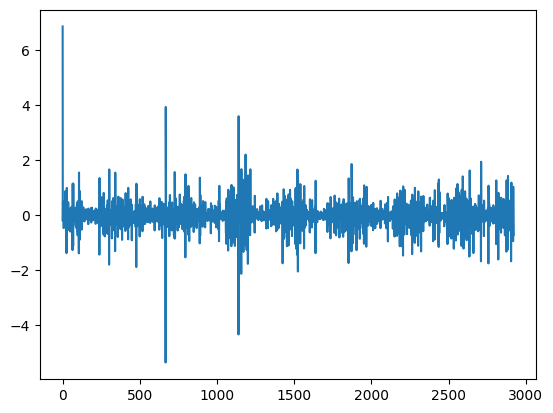

In [ ]:
#here, we compute the difference of consecutive terms in the series.
#We will also perform log transform
df_v2['total_cust_log'] = np.log(df_v2['total_cust'])
df_v2['total_cust_diff'] = df_v2['total_cust_log']-df_v2['total_cust_log'].shift(periods=1, freq=None, axis=0, fill_value=0)
df_v2['total_cust_diff'].dropna().plot()

When learning about time series, we came to know that to make to make time series stationary there are certain tests which needs to be done. These test are as per mentioned in the online resources available used for handling stationary time series.

In [ ]:
#Augmented Dickey Fuller Test to make the time series stationary
def adf_test(df, col_names):
    for name in col_names:
        print ('Results of Augmented Dickey-Fuller Test for {}'.format(name))
        result_test = adfuller(df[name], autolag='AIC')
        result_output = pd.Series(result_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key, val in result_test[4].items():
            result_output['Critical Value (%s)'%key] = val
        print (result_output)

In [ ]:
testing_df = pd.DataFrame()
testing_features = [ 'precip','fog','temp_min', 'temp_max','wind','total_cust']

for col in testing_features:
    col_mean = df_v2[col].rolling(16).mean()[15:-1]
    col_std = df_v2[col].rolling(16).std()[15:-1]
    testing_df[col+'_mean16'] = col_mean.values
    testing_df[col+'_std16'] = col_std.values

In [ ]:
## adf test for total_customers
from statsmodels.tsa.stattools import adfuller
adf_test(df_v2, ['total_cust'])

Results of Augmented Dickey-Fuller Test for total_cust
Test Statistic                   -3.068277
p-value                           0.028992
#Lags Used                       22.000000
Number of Observations Used    2899.000000
Critical Value (1%)              -3.432608
Critical Value (5%)              -2.862538
Critical Value (10%)             -2.567301
dtype: float64


In [ ]:
# adf test for total_cust_total-2
adf_test(df_v2, ['total_cust_diff'])

Results of Augmented Dickey-Fuller Test for total_cust_diff
Test Statistic                -1.586558e+01
p-value                        9.106081e-29
#Lags Used                     2.500000e+01
Number of Observations Used    2.896000e+03
Critical Value (1%)           -3.432610e+00
Critical Value (5%)           -2.862539e+00
Critical Value (10%)          -2.567302e+00
dtype: float64


In [ ]:
adf_test(testing_df, testing_df.columns)

Results of Augmented Dickey-Fuller Test for precip_mean16
Test Statistic                -8.653360e+00
p-value                        5.045121e-14
#Lags Used                     2.700000e+01
Number of Observations Used    2.878000e+03
Critical Value (1%)           -3.432624e+00
Critical Value (5%)           -2.862545e+00
Critical Value (10%)          -2.567305e+00
dtype: float64
Results of Augmented Dickey-Fuller Test for precip_std16
Test Statistic                -8.039646e+00
p-value                        1.861900e-12
#Lags Used                     1.600000e+01
Number of Observations Used    2.889000e+03
Critical Value (1%)           -3.432616e+00
Critical Value (5%)           -2.862541e+00
Critical Value (10%)          -2.567303e+00
dtype: float64
Results of Augmented Dickey-Fuller Test for fog_mean16
Test Statistic                -6.086270e+00
p-value                        1.062562e-07
#Lags Used                     1.700000e+01
Number of Observations Used    2.888000e+03
Critical

**Test for Augmented Dickey Fuller, or ADF:**
Among the statistical tests is the Dickey Fuller test. It can be used to ascertain whether the series has a unit root, which will enable us to determine whether the series is stationary or not. The following are the test's alternate and null hypotheses:

Null hypothesis  says Data is not stationary
An alternate theory states that the data is stationary.

**The results can be interpret as below:**
-If critical value> test_statistic than null hypothesis is rejected ie data is stationary
-If critical value< test_statistic than null hypothesis is not rejected ie data is not stationar

Advanced techniques such as trend stationarity and difference stationarity can be used to verify stationarity. The KPSS test is required to determine trend stationarity. The findings indicate that there is non-stationarity between total_cust and total_cust_total-2 at the 1% level.

The KPSS test must be implemented in order to determine the stationarity trend in timeseries data.

In [ ]:
#kwiatkowski-Phillips-Schmidt-Shin Test
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(df, col_names):
    for name in col_names:
        print ('Results of KPSS Test for {}'.format(name))
        result_test = kpss(df[name], regression='c', lags='legacy')
        result_output = pd.Series(result_test[0:3], index=['Test Statistic','p-value','Lags Used'])
        for key, val in result_test[3].items():
            result_output['Critical Value (%s)'%key] = val
        print (result_output)

In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df, col_names):
    for name in col_names:
        print('Results of KPSS Test for {}'.format(name))
        result_test = kpss(df[name], regression='c')  # Remove 'lags' parameter
        result_output = pd.Series(result_test[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
        for key, val in result_test[3].items():
            result_output['Critical Value (%s)' % key] = val
        print(result_output)

# kpss test for total_cust
kpss_test(df_v2, ['total_cust'])


Results of KPSS Test for total_cust
Test Statistic            4.164139
p-value                   0.010000
Lags Used                30.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-352-c91dc646f988>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_test = kpss(df[name], regression='c')  # Remove 'lags' parameter


In [ ]:
# kpss test for total_cust_t-1
kpss_test(df_v2, ['total_cust_diff'])

Results of KPSS Test for total_cust_diff
Test Statistic             0.379264
p-value                    0.086093
Lags Used                153.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


In [ ]:
# kpss test for total_cust
kpss_test(testing_df, testing_df.columns)

Results of KPSS Test for precip_mean16
Test Statistic            0.186965
p-value                   0.100000
Lags Used                30.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for precip_std16
Test Statistic            0.126096
p-value                   0.100000
Lags Used                30.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for fog_mean16
Test Statistic            0.401915
p-value                   0.076330
Lags Used                30.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test for fog_std16
Test Statistic            0.406448
p-value                   0.074376
La

<ipython-input-352-c91dc646f988>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_test = kpss(df[name], regression='c')  # Remove 'lags' parameter
<ipython-input-352-c91dc646f988>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_test = kpss(df[name], regression='c')  # Remove 'lags' parameter
<ipython-input-352-c91dc646f988>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_test = kpss(df[name], regression='c')  # Remove 'lags' parameter
<ipython-input-352-c91dc646f988>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is gr

The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is a statistical tool used to determine whether a series centered on a deterministic trend is stationar. Similar to the ADF test, the KPSS test is frequently employed to evaluate a series' stationarity. In terms of functionality and actual use, it differs significantly from the ADF test in a few important ways.

The null hypothesis states that the data is steady.
A different theory claims that the data is not stationary.

The findings can be explained as follows:
-If critical value < test_statistic, the null hypothesis (that is, the data are not stationary) is rejected.
-The null hypothesis, i.e., that the data is stationar, is not rejected if critical value >test statistic


The timeseries must either show a difference or a stationary trend in order for the transformation to be necessary.

If a timeseries is trend stationary and a difference, then no transformations are required. If a timeseries is not trend stationary but is not a difference, then total_cust transformations are required.
In the event that the timeseries is neither stationary in trend nor different, transformations of total_cust_total-2 are required.

## Voting regressor

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt
import xgboost
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [ ]:
X=df_v3.iloc[:,:]
X.drop(columns='total_cust')
y=pd.DataFrame(data=df_v3["total_cust"])

In [ ]:
X['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [ ]:
x_array=X_train.values

In [ ]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train_pred = ereg.predict(X_train)

In [ ]:
y_train.info()
y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 2369 to 1544
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_cust  2045 non-null   float64
dtypes: float64(1)
memory usage: 32.0 KB


,total_cust
2369,15015.0
746,3477.0
2175,4556.0
348,3670.0
2851,10201.0
...,...
1930,10523.0
79,2058.0
1859,4243.0
2840,6972.0


In [ ]:
df_v3.columns

Index(['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip', 'wind',
       'casual', 'registered', 'total_cust', 'holiday', 'rain', 'fog', 'ice',
       'year', 'season_spring', 'season_summer', 'season_fall',
       'dayOfWeek_Friday', 'dayOfWeek_Monday', 'dayOfWeek_Saturday',
       'dayOfWeek_Sunday', 'dayOfWeek_Thursday', 'dayOfWeek_Tuesday',
       'dayOfWeek_Wednesday', 'total_cust_log', 'total_cust_diff'],
      dtype='object')

In [ ]:
rmse_voting = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmsle_voting= np.sqrt(mean_squared_log_error(y_train, y_train_pred))
mae_voting= mean_absolute_error(y_train, y_train_pred)

cod_voting=r2_score(y_train, y_train_pred)

list_scores_voting = []
list_scores_voting.extend([rmse_voting, rmsle_voting, mae_voting,cod_voting])

In [ ]:
list_scores_voting

[9.724391255719832,
 0.028106630982396755,
 7.224768363793468,
 0.9999932812599694]

## XG_boost

XGBoost, short for eXtreme Gradient Boosting, is a powerful and efficient machine learning algorithm designed for classification and regression tasks. It belongs to the family of ensemble learning methods, specifically gradient boosting frameworks. Here are some key characteristics and features of XGBoost:

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import xgboost
#from sklearn.ensemble import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

In [ ]:
X=df_v3.iloc[:,:]
X.drop(columns='total_cust')
y=pd.DataFrame(data=df_v3["total_cust"])

In [ ]:
X['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [ ]:
xgb_clf = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=100,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1,subsample=1, verbosity=0)
xgb_clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [ ]:
y_train_pred = xgb_clf.predict(X_train)

In [ ]:
y_train.info()
y_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 2369 to 1544
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_cust  2045 non-null   float64
dtypes: float64(1)
memory usage: 32.0 KB


,total_cust
2369,15015.0
746,3477.0
2175,4556.0
348,3670.0
2851,10201.0
...,...
1930,10523.0
79,2058.0
1859,4243.0
2840,6972.0


In [ ]:
df_v3.columns

Index(['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip', 'wind',
       'casual', 'registered', 'total_cust', 'holiday', 'rain', 'fog', 'ice',
       'year', 'season_spring', 'season_summer', 'season_fall',
       'dayOfWeek_Friday', 'dayOfWeek_Monday', 'dayOfWeek_Saturday',
       'dayOfWeek_Sunday', 'dayOfWeek_Thursday', 'dayOfWeek_Tuesday',
       'dayOfWeek_Wednesday', 'total_cust_log', 'total_cust_diff'],
      dtype='object')

Lets evalue our model performance

In [ ]:
rmse_boost = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmsle_boost = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
mae_boost= mean_absolute_error(y_train, y_train_pred)
cod_boost=r2_score(y_train, y_train_pred)
list_scores_boost = []
list_scores_boost.extend([rmse_boost, rmsle_boost, mae_boost,cod_boost])

In [ ]:
list_scores_boost

[13.715352015067177,
 0.008831793725427778,
 10.440528697547819,
 0.9999866347555597]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


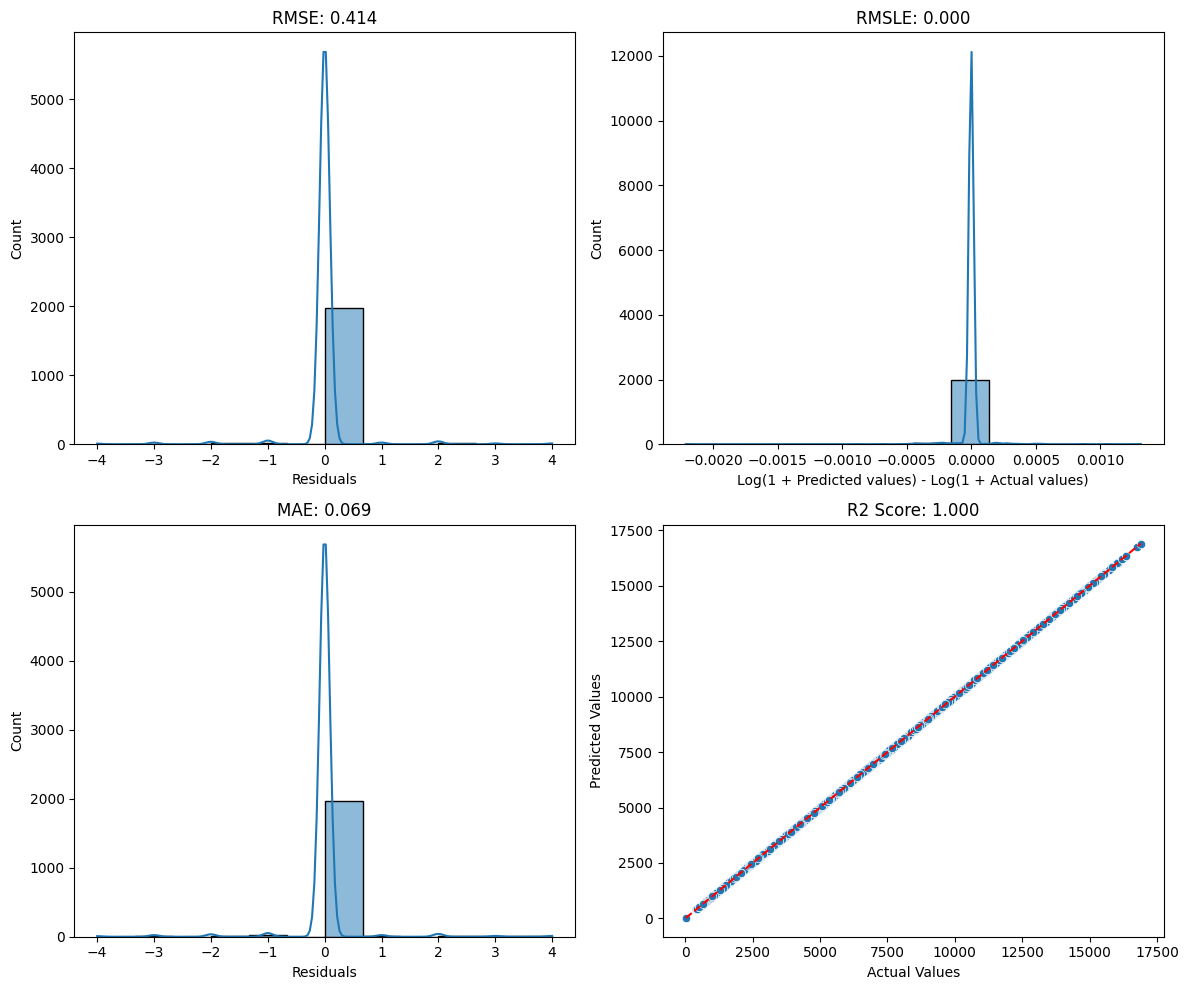

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

# Assuming df_v3 is your preprocessed dataset

# Feature matrix X and target variable y
X = df_v3.drop(columns=['total_cust'])
y = df_v3['total_cust']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Initialize AdaBoostRegressor with a DecisionTreeRegressor as a base estimator
ada_clf = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=200, learning_rate=1, random_state=100)

# Fit the model
ada_clf.fit(X_train, y_train)

# Predictions on training set
y_train_pred = ada_clf.predict(X_train)

# Core metrics calculation
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
mae = mean_absolute_error(y_train, y_train_pred)
cod = r2_score(y_train, y_train_pred)

# Visualization of metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# RMSE
sns.histplot(y_train - y_train_pred, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'RMSE: {rmse:.3f}')
axes[0, 0].set_xlabel('Residuals')

# RMSLE
sns.histplot(np.log1p(y_train) - np.log1p(y_train_pred), kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'RMSLE: {rmsle:.3f}')
axes[0, 1].set_xlabel('Log(1 + Predicted values) - Log(1 + Actual values)')

# MAE
sns.histplot(y_train - y_train_pred, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'MAE: {mae:.3f}')
axes[1, 0].set_xlabel('Residuals')

# R2 Score
sns.scatterplot(x=y_train, y=y_train_pred, ax=axes[1, 1])
axes[1, 1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linestyle='--', color='red')
axes[1, 1].set_title(f'R2 Score: {cod:.3f}')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

The provided code builds a multi-panel bar chart that shows performance metrics for various machine learning algorithms using Matplotlib. Root Mean Squared Error (RMSE), Root Mean Squared Logarithmic Error (RMSLE), and Mean Absolute Error (MAE) are shown in three subplots. These metrics are used to represent each algorithm, such as AdaBoost, CatBoost, GradientBoost, and XGBoost, with matching values. The heights of the bars in each subplot show how big each algorithm's corresponding metric is. To improve visual clarity, different colors are used in the code for each metric. Furthermore, an attempt has been made to incorporate Coefficient of Determination (cod) values into the first subplot; however, since this subplot is repeated, the implementation may require revision. All things considered, this graphic offers a comparison of algorithm performance based on several assessment.

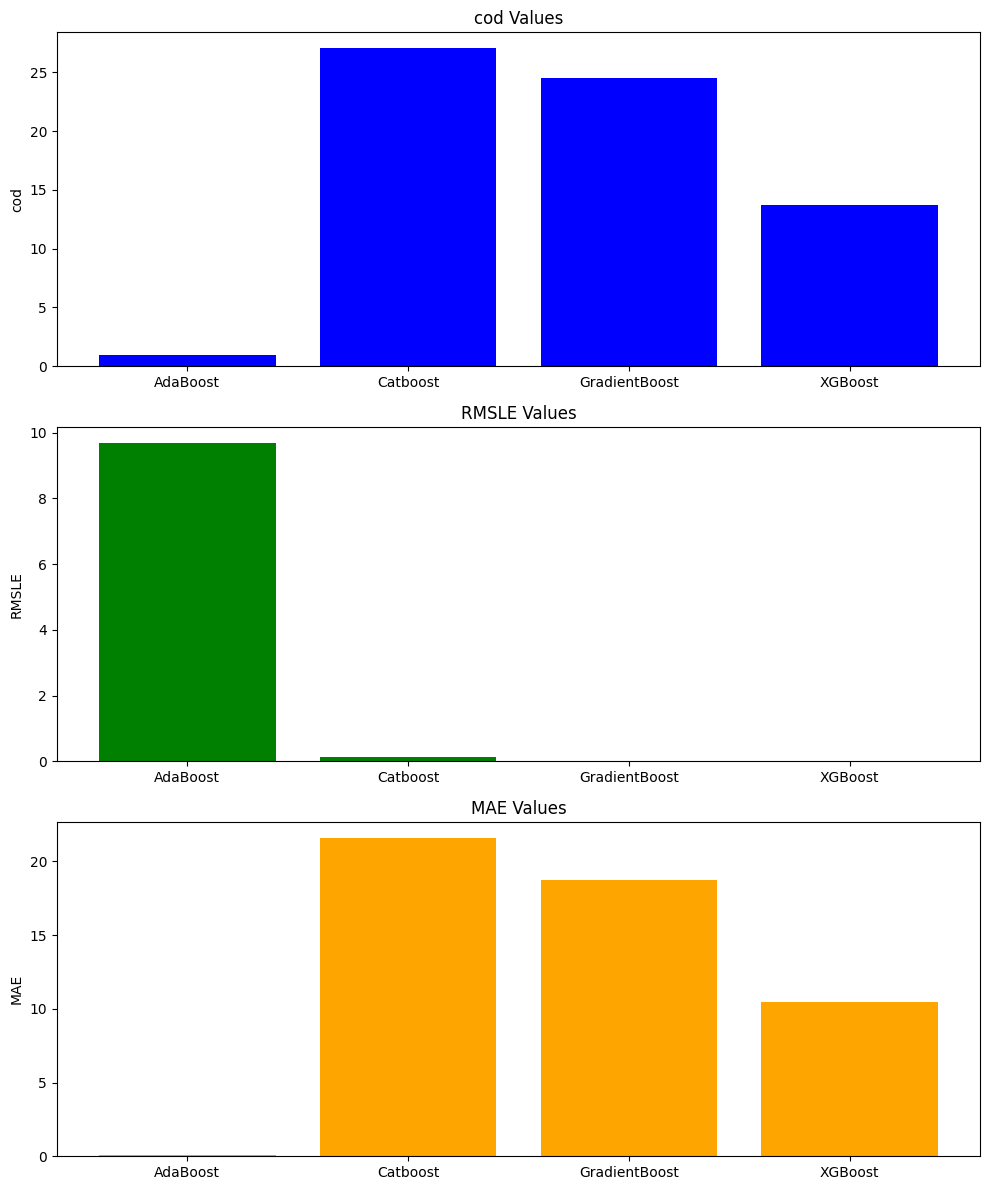

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
algorithms= ["AdaBoost", "Catboost", "GradientBoost", "XGBoost"]
rmse_values = [0.379163,27.04 ,24.5362,13.715]
rmsle_values = [9.674, 0.128409,  0.0120,0.0088]
mae_values = [0.06062,  21.567, 18.7207,10.440]
cod_values=[0.9999,0.999,0.999957226,0.999]

# Number of algorithms
num_algorithms = len(algorithms)

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# RMSE visualization
axes[0].bar(algorithms, rmse_values, color='blue')
axes[0].set_title('RMSE Values')
axes[0].set_ylabel('RMSE')

# RMSLE visualization
axes[1].bar(algorithms, rmsle_values, color='green')
axes[1].set_title('RMSLE Values')
axes[1].set_ylabel('RMSLE')

# MAE visualization
axes[2].bar(algorithms, mae_values, color='orange')
axes[2].set_title('MAE Values')
axes[2].set_ylabel('MAE')

axes[0].bar(algorithms,cod_values, color='blue')
axes[0].set_title('cod Values')
axes[0].set_ylabel('cod')
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
